In [1]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import torch
import numpy as np

In [2]:
# Load a model
model = YOLO('../models/yolov8n-seg.pt')  # pretrained YOLOv8n model

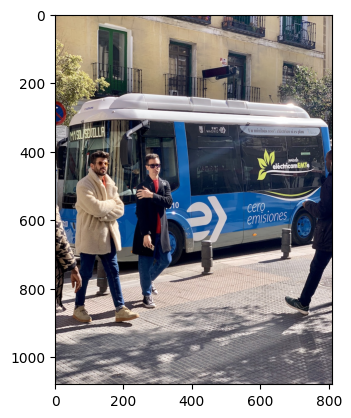

In [3]:
image = cv2.imread('../images/bus.jpg')

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))


In [4]:
results = model.predict(image)


0: 640x480 4 persons, 1 bus, 1 skateboard, 92.4ms
Speed: 4.5ms preprocess, 92.4ms inference, 9.5ms postprocess per image at shape (1, 3, 640, 480)


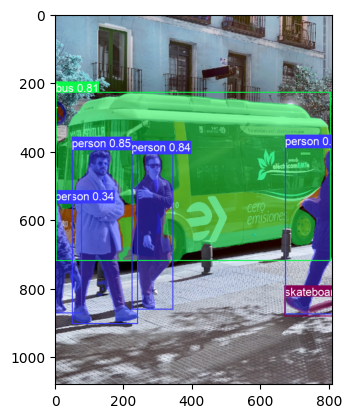

In [5]:
res_plotted = results[0].plot(pil=True)
plt.imshow(res_plotted)
plt.show()

In [28]:
results[0].masks[0].xy[0].astype(int)

array([[804, 391],
       [794, 401],
       [794, 403],
       [791, 406],
       [791, 408],
       [789, 410],
       [789, 423],
       [788, 425],
       [788, 430],
       [789, 432],
       [789, 445],
       [791, 447],
       [791, 450],
       [793, 452],
       [793, 453],
       [794, 455],
       [794, 465],
       [793, 467],
       [793, 469],
       [789, 472],
       [789, 475],
       [788, 477],
       [788, 479],
       [786, 480],
       [786, 482],
       [784, 484],
       [784, 486],
       [783, 487],
       [783, 489],
       [777, 494],
       [777, 496],
       [776, 497],
       [776, 501],
       [774, 502],
       [774, 506],
       [772, 507],
       [772, 509],
       [771, 511],
       [771, 516],
       [769, 518],
       [769, 519],
       [767, 521],
       [767, 528],
       [766, 529],
       [766, 533],
       [761, 538],
       [757, 538],
       [756, 536],
       [754, 536],
       [752, 534],
       [744, 534],
       [742, 536],
       [740,

In [7]:
results[0].masks[0].xy[0].shape

(245, 2)

In [26]:
img_temp = image.copy()

for mask in results[0].masks:
    p1 = [-1, -1]
    p2 = [-1, -1]

    for i, xy in enumerate(mask.xy):
        points = xy.astype(int)
        img_temp = cv2.drawContours(img_temp, [points], 0, (0, 0, 255), 5)
    # print(i)
    break

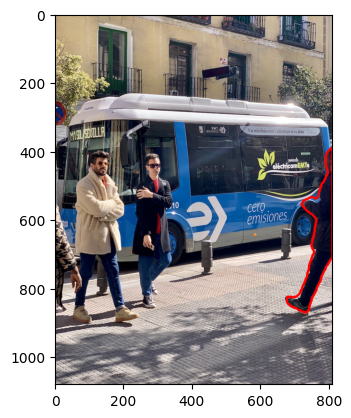

In [27]:
plt.imshow(cv2.cvtColor(img_temp, cv2.COLOR_BGR2RGB))